In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
    "oracle.run2",
    "oracle.run1",
    "cores",
    "metehan",
    "wisig",
    "oracle.run1.framed",
    "oracle.run2.framed",
]

experiments = {}

for experiment in experiments_to_get:
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "baseline_ptn", experiment)
    )

In [3]:
for experiment,trials in experiments.items():
    assert len(trials) == 3

In [4]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
])

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs
0,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2046.432875
1,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2033.514022
2,oracle.run2,0.780903,0.616998,0.619792,1.124147,12,2030.452324
3,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2039.134329
4,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2049.325162
5,oracle.run1,0.709375,0.757849,0.604583,1.100661,12,2039.606050
6,cores,0.994971,0.021911,0.954981,0.160004,14,426.181435
7,cores,0.994971,0.021911,0.954981,0.160004,14,430.190394
8,cores,0.994971,0.021911,0.954981,0.160004,14,429.055435
9,metehan,0.899123,0.323528,0.872807,0.328530,5,30.251898


In [5]:
# Show that all the trial accuracies are the same, but we have unique times for each
g = all_trials.groupby("experiment_name")[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]].nunique()
g["Trial Count"] = all_trials.groupby("experiment_name").size()
g

,source_val_label_accuracy,target_val_label_accuracy,total_experiment_time_secs,Trial Count
experiment_name,,,,
cores,1,1,3,3
metehan,1,1,3,3
oracle.run1,1,1,3,3
oracle.run1.framed,1,1,3,3
oracle.run2,1,1,3,3
oracle.run2.framed,1,1,3,3
wisig,1,1,3,3


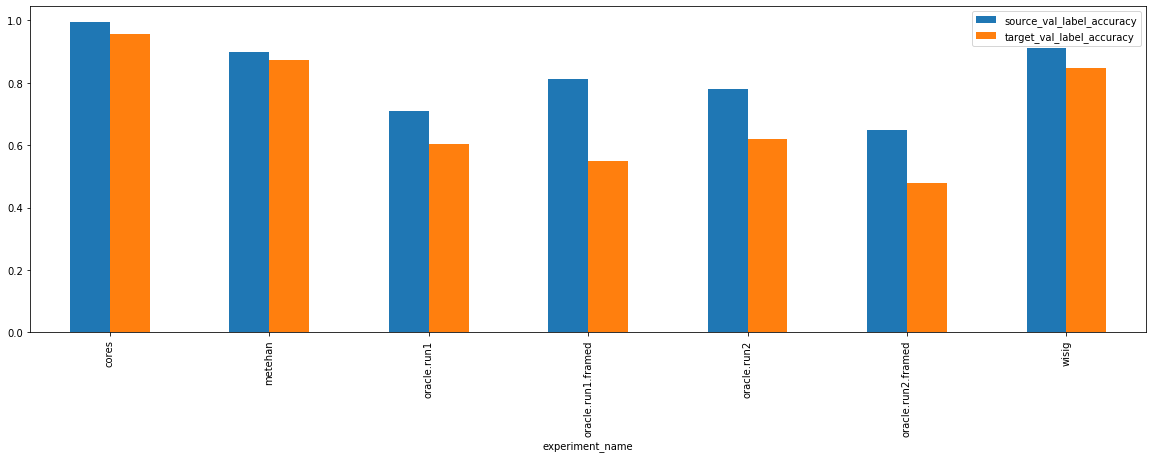

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 6]

g = all_trials.groupby("experiment_name")[["source_val_label_accuracy", "target_val_label_accuracy"]].mean()

g.plot(kind="bar")

In [7]:
g

,source_val_label_accuracy,target_val_label_accuracy
experiment_name,,
cores,0.994971,0.954981
metehan,0.899123,0.872807
oracle.run1,0.709375,0.604583
oracle.run1.framed,0.811111,0.550521
oracle.run2,0.780903,0.619792
oracle.run2.framed,0.647569,0.478958
wisig,0.910897,0.847009
